# AirBnB New York Data Analysis and Price Forecast

🧸 Hi there, We are TEAM `coffee prince`. We do analysis with this AirBnB Dataset.  
This notebook contains EDA and Feature Engineering.   
We only do feature engineering for name column.  

Our feature engineering code contains only name. 

## 00. Library

EDA Predicts Price After Feature Engineering Using Boosting Family Models 'LightGBM', 'XGBoost' and 'CatBoost'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV 


## Visualization Initialization

In [2]:
# Define the base color (Airbnb-like color)
base_color = "#FF5733"

# Create a gradient color palette with 10 colors
grad_palette = sns.light_palette(base_color, n_colors=10, input="hex", reverse=True)

# Set the Seaborn style and custom gradient color palette
sns.set(style="whitegrid")
sns.set_palette(grad_palette)

## 01. EDA

- **id** : id value of hosted house 
   - Based on Airbnb accommodation inquiry
   - - https://www.airbnb.co.kr/rooms/{id}  
- **name** : Name introducing the hosted home 
   - a pretty house with a swimming pool
- **host_id**: id of the host 
- **host_name** : Name of the host
- **neighbourhood_group**: the area where the hosted home is located
- **neighbourhood**: Nomination around hosted home
- **latitude**: latitude
- **longitude**: hardness
- **room_type**: Type of hosted home
- **price**: Daily accommodation price (target variable)
- **minimum_nights**: Minimum number of nights 
 - **number_of_reviews** : Total number of reviews 
- **last_review**: Last review date
- **reviews_per_month**: number of reviews per month 
- **calculated_host_listings_count**: Number of accommodations hosted by the host 
- **availability_365**: number of days 
- **number_of_reviews_ltm**: Number of reviews in the last n months 
- **license**: Accommodation License
    - 'Special': Only one person has a license

In [6]:
# df = pd.read_csv('/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv')
df = pd.read_csv('../NYC-Airbnb-2023.csv')

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_11056/3949286476.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../NYC-Airbnb-2023.csv')


In [7]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN


**Check the NULL ratio**
- **name**: approximately 2% no accommodation name
-  **host_name** : approximately 1%
- **last_review, reviews_per_month**: 24% of accommodations without reviews
-  **license** : 99.9% 
    - Only one license is available

In [8]:
columns = df.columns
total_rows = df.shape[0]

for c in columns:
    null_count = df[c].isnull().sum()
    null_ratio = round((null_count / total_rows) * 100, 2)
    print(f"null ratio of {c}: {null_ratio}%")

null ratio of id: 0.0%
null ratio of name: 0.03%
null ratio of host_id: 0.0%
null ratio of host_name: 0.01%
null ratio of neighbourhood_group: 0.0%
null ratio of neighbourhood: 0.0%
null ratio of latitude: 0.0%
null ratio of longitude: 0.0%
null ratio of room_type: 0.0%
null ratio of price: 0.0%
null ratio of minimum_nights: 0.0%
null ratio of number_of_reviews: 0.0%
null ratio of last_review: 24.0%
null ratio of reviews_per_month: 24.0%
null ratio of calculated_host_listings_count: 0.0%
null ratio of availability_365: 0.0%
null ratio of number_of_reviews_ltm: 0.0%
null ratio of license: 100.0%


**Check technical statistics**
- Range of values such as num_of_reviews, minimum_nights, etc. is wide  
Consider reducing deviations with ${\rightarrow}$ Scaling

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,32627.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,1.168988,24.054809,140.262211,7.736507
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,1.789675,80.867958,142.001486,18.290256
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,0.520000,1.000000,89.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,1.670000,4.000000,289.000000,7.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000,1093.000000


In [10]:
def show_bar_plot(df:pd.DataFrame, features:list , y: str, oriend_c_num:int=2):
    
    """
    A function that draws a bar plot after calculating the count by group based on the features in features
    """

    # Define the base color (Airbnb-like color)
    base_color = "#FF5A5F"

    # Create a gradient color palette with 10 colors
    grad_palette = sns.light_palette(base_color, n_colors=10, input="hex", reverse=True)

    # Set the Seaborn style and custom gradient color palette
    sns.set(style="whitegrid", palette=grad_palette)
    
    
    r_num = len(features) // oriend_c_num 
    c_num = oriend_c_num
    
    
    fig, axes = plt.subplots(r_num, c_num, figsize=(10, 5))

    for i, x in enumerate(features):
        
        row = i // c_num
        col = i % c_num
        cnt_df = df.groupby(x).count()[y].reset_index()
        ax = axes[row][col] if r_num > 1 else axes[col]

        sns.barplot(data = cnt_df,x = x, y = y, ax=ax) #, palette = ""

        # Adding labels and title
        plt.xlabel(x)
        plt.ylabel('Count')
        plt.title(f'Number of {y} by {x}')

        # Rotating x-axis labels if needed
        plt.xticks()
    plt.tight_layout()
    # Displaying the graph
    plt.show()

**neighbourhood_group**  
5 groups exist and Manhattan has the most 


**room_type**  
Fewer Hotel Rooms and Sahred Rooms  
${\rightarrow}$Low number of Hotel Rooms and high price range

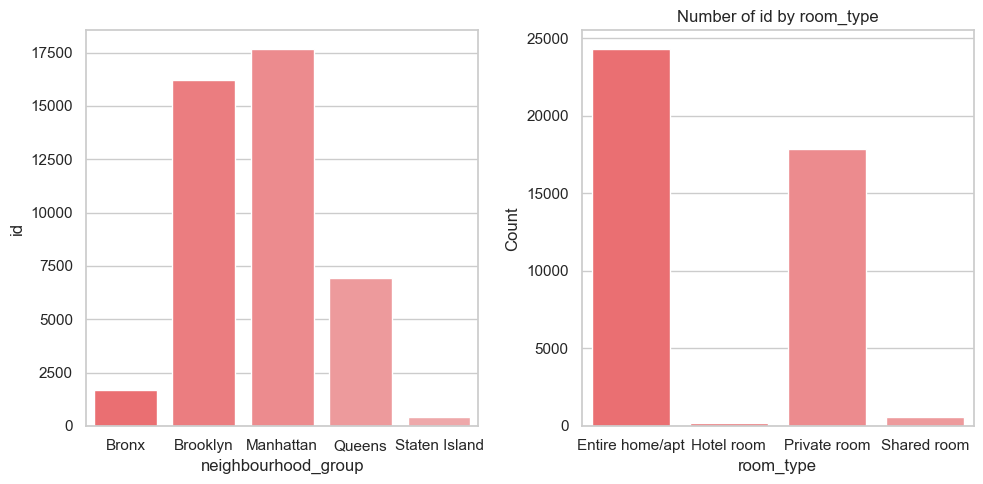

In [11]:
show_bar_plot(df,features =[ 'neighbourhood_group', 'room_type'],y = 'id')

**Check the number of reviews**
- Mostly zero reviews, only a few properties have a high number of reviews

In [12]:
review_num_count = df.groupby('number_of_reviews_ltm').count()['id'].reset_index()

In [13]:
review_num_count.sort_values('id', ascending=False)

,number_of_reviews_ltm,id
0,0,21470
1,1,3377
2,2,2238
3,3,1711
4,4,1226
...,...,...
135,158,1
136,162,1
137,164,1
138,171,1


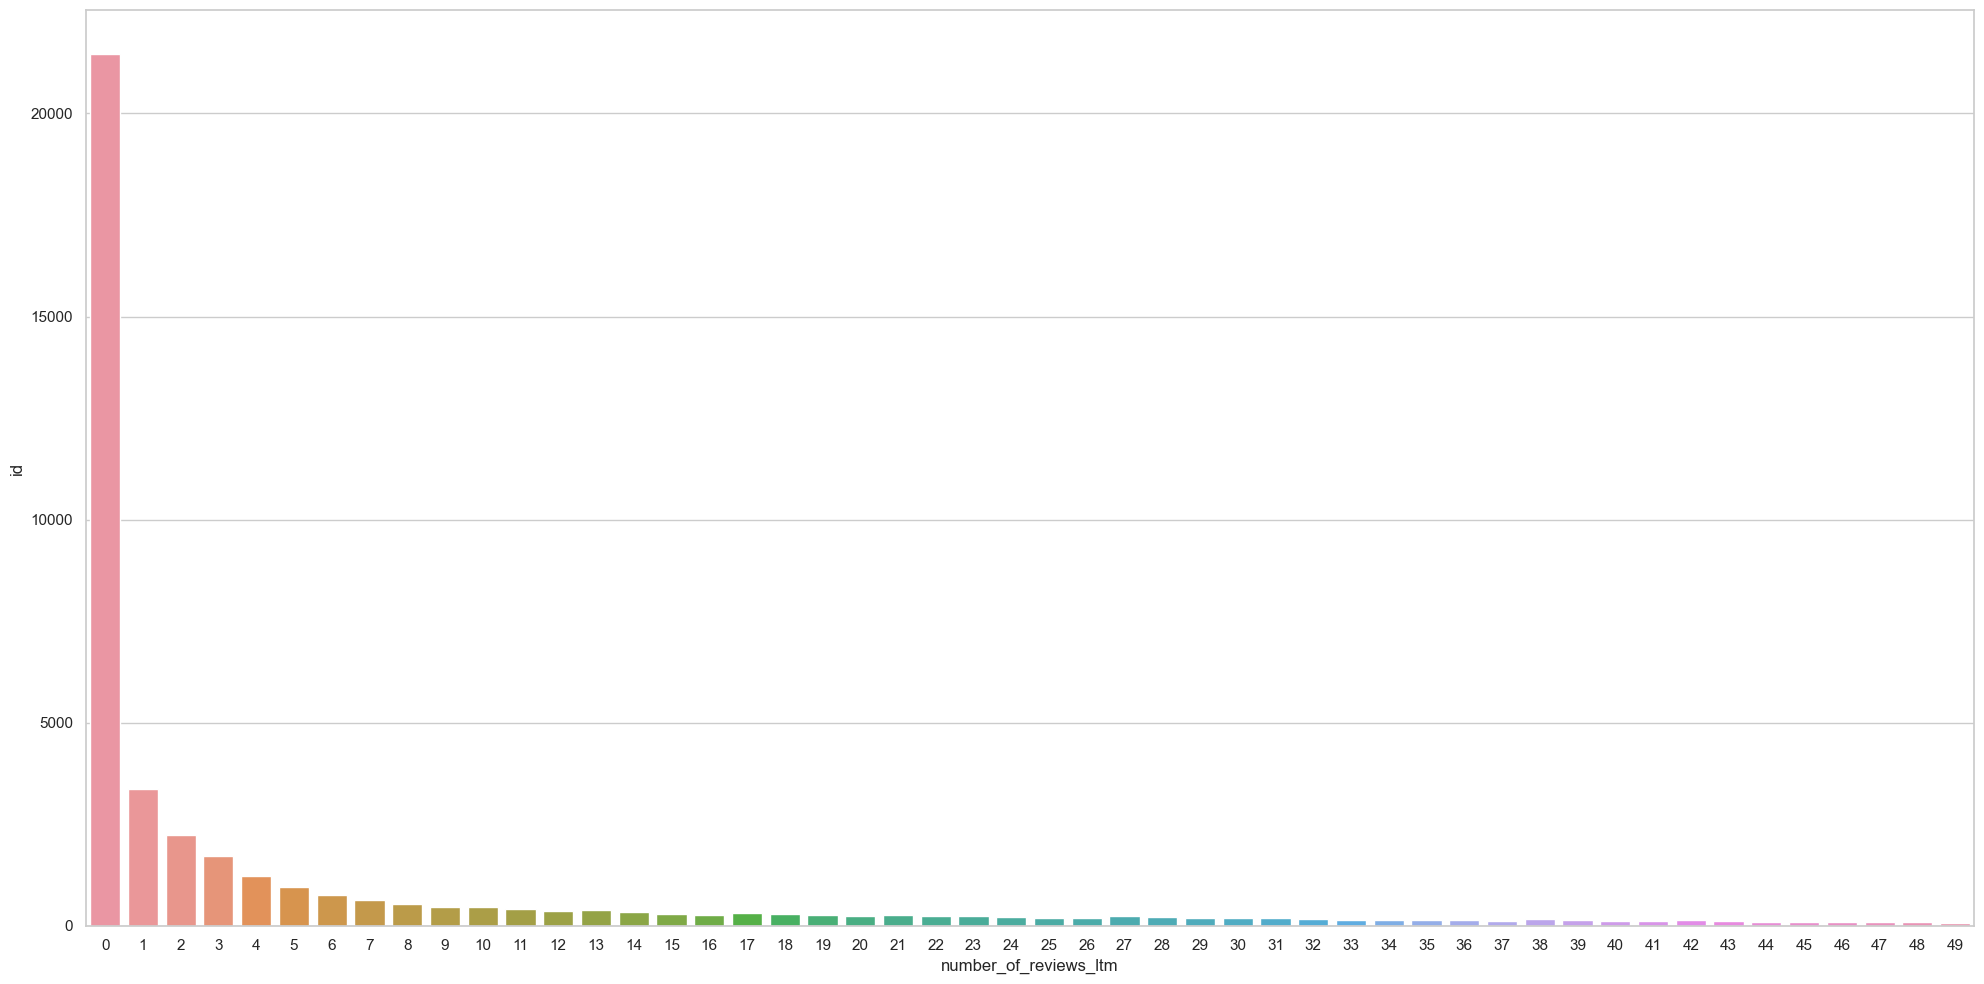

In [14]:
plt.figure(figsize=(20,10))

sns.barplot(data=review_num_count[:50], x='number_of_reviews_ltm', y='id')

plt.tight_layout()

**Check the number of houses hosted**

In [15]:
df['calculated_host_listings_count'].unique()

array([  3,   2,   1,   4,   5,  30,   9,   6,   7,  10,  12,   8,  17,
        15,  19,  29, 159,  38,  28,  31,  62,  57,  51, 207,  33,  14,
       131, 124,  11, 113,  16,  23,  83, 526, 394, 192, 178,  76,  18,
        13,  63,  36,  24,  54,  48, 222,  88, 101,  27,  47,  25,  32,
        59,  53,  21,  22,  44,  20,  35,  41,  39, 120, 107,  69, 356])

**Check correlation**
- 'Note' id and target variable do not check correlation 'priority'
   - Host id is treated as an interval variable because it is related to the status, location, etc. of the house hosted by host  
  - Number_of_reviews, reviews_per_month, and number_of_review_itm are highly correlated, so two must be removed

In [16]:
def show_heatmap_with_corr(df:pd.DataFrame , drop_column:str=['id', 'latitude', 'longitude', 'price']):
    # Create a correlation matrix
    # Show up to the second decimal place
#     # Define the base color (Airbnb-like color)
#     base_color = "#FF5A5F"

#     # Create a gradient color palette with 10 colors
#     grad_palette = sns.light_palette(base_color, n_colors=100, input="hex", reverse=True)

#     # Set the Seaborn style and custom gradient color palette
#     sns.set(style="whitegrid", palette=grad_palette)
    
    try :
        corr_df = df.drop(drop_column, axis = 1)
    except : 
        print("The column to remove does not already exist in the dataframe.")
    else:
        correlation_matrix = corr_df.corr().round(2)

        # Specifying Image Size
        plt.figure(figsize=(20,10))

        # Show Correlation Matrix
        sns.heatmap(data=correlation_matrix, annot=True, cmap = "Reds_r")

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_11056/3310868678.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = corr_df.corr().round(2)


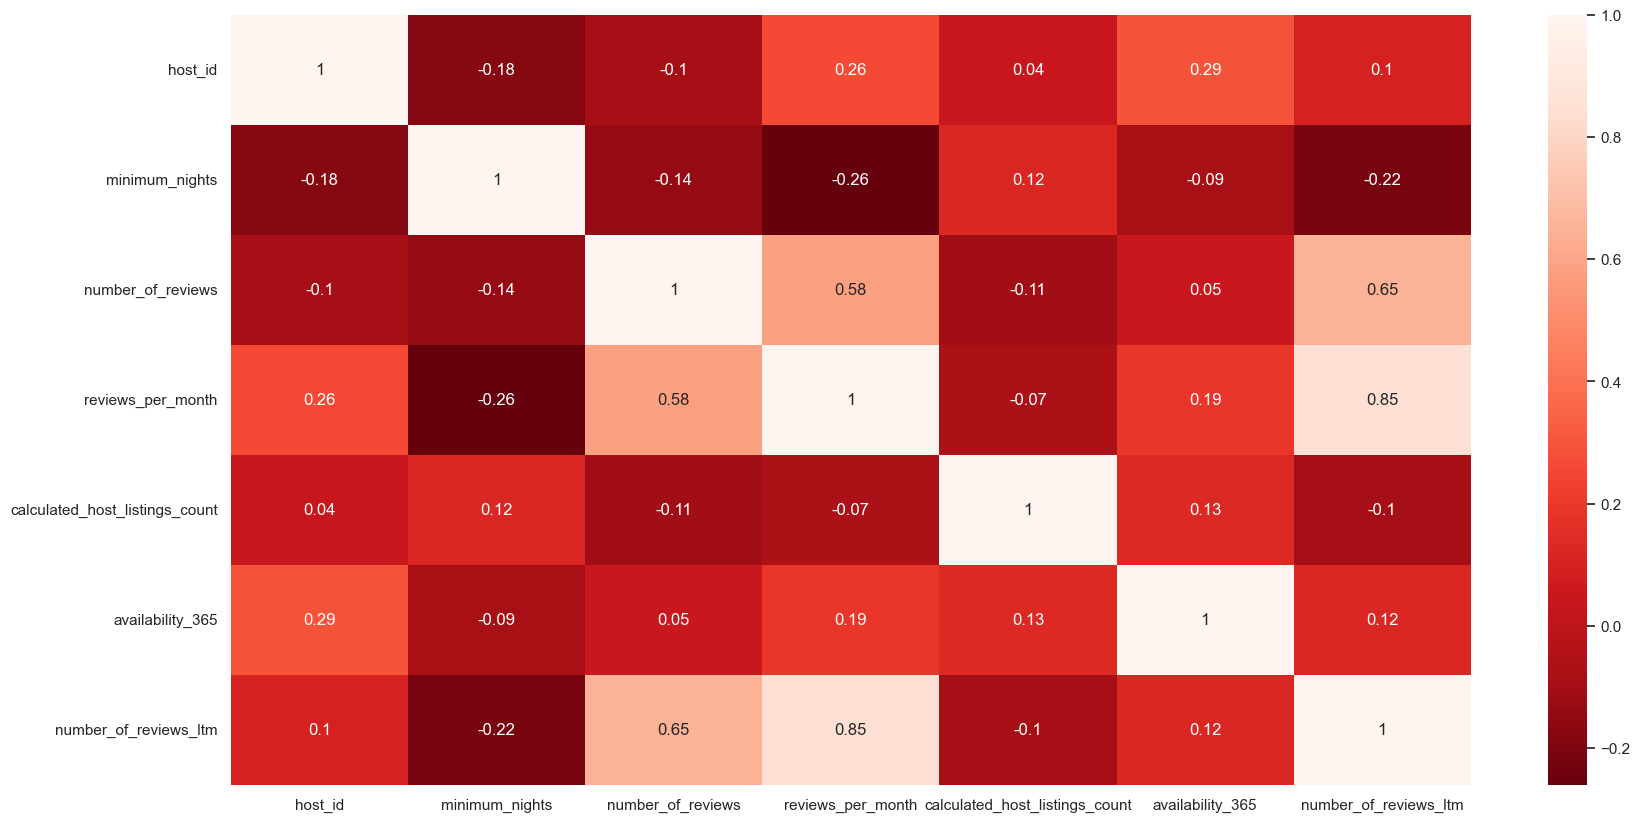

In [17]:
show_heatmap_with_corr(df)

In [18]:
# Number by host id (=number of hosting houses)
df.groupby('host_id')['id'].count().sort_values( ascending=False)[:10].reset_index()

,host_id,id
0,107434423,526
1,3223938,394
2,496944100,356
3,305240193,222
4,19303369,207
5,200239515,192
6,204704622,178
7,162280872,159
8,51501835,131
9,61391963,124


**Which home did the person who hosted the most homes host?**
- Keywords such as gym and pool exist

In [19]:
df[df['host_id'] == 107434423].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
11486,20845031,"Midtown E. 1BR w/ Gym, Doorman, nr the 6",107434423,Blueground,Manhattan,Kips Bay,40.745723,-73.979862,Entire home/apt,386,31,0,NaN,NaN,526,216,0,NaN
12885,23264421,"Midtown E. 1BR w/ Gym, nr Grand Central",107434423,Blueground,Manhattan,Murray Hill,40.748405,-73.979865,Entire home/apt,538,31,0,NaN,NaN,526,0,0,NaN


In [20]:
df[df['host_id'] == 107434423]['name'].unique()

array(['Midtown E. 1BR w/ Gym, Doorman, nr the 6',
       'Midtown E. 1BR w/ Gym, nr Grand Central',
       'Park Avenue 1BR w/ Gym, Doorman in Midtown',
       'Tribeca 1BR w/ Gym, Doorman & Roof deck',
       'Winged Tribeca Studio w/ Indoor pool, Gym',
       'UES Studio w/ Balcony, Gym & Doorman',
       '1BR nr Times Sq w/ Indoor pool & Gym',
       'Tribeca Studio w/ Great views & Indoor pool',
       'E. Village 1BR, Gym, Doorman, Rooftop',
       'UWS 1BR w/ Stunning Gym, Doorman & Rooftop',
       'Chelsea 1BR w/ Balcony, Doorman & Gym',
       'UWS 1BR w/ Open kitchen, Doorman & Gym',
       'Wall St 1BR w/ Gym, Doorman, Roof deck',
       'UES 1BR w/Doorman 15m nr Central Park',
       'Wall St 1BR w/Speakeasy, Doorman & Gym',
       'Studio in Trendy Tribeca, Indoor pool & Gym',
       'Central W. Village 1BR, Gym, Doorman',
       'Charismatic 1BR in W. Village w/ Doorman & Gym',
       'Sq 1BR w/ Great views & Indoor pool',
       '2BR nr Times Sq w/ Indoor pool & Gym',
 

In [21]:
# 444 except for those with the same dorm name
df[df['host_id'] == 107434423]['name'].nunique()

444

In [22]:
# Days Available
df['availability_365'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [23]:
# Verifying Licenses
df[~df['license'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
10101,17984049,Apartamento Algarve Holidays,120181746,Isabel,Manhattan,Flatiron District,40.74075,-73.98902,Entire home/apt,133,30,1,2017-07-19,0.01,1,126,0,41662/AL


**Check the columns to be used**

- [ ] **id** : id value of hosted house 
   - Based on Airbnb accommodation inquiry
   - - https://www.airbnb.co.kr/rooms/{id}  
- [x] **name** : Name introducing the hosted home 
   - a pretty house with a swimming pool
- [x] **host_id** : id of the host 
- [x] **host_name** : Name of the host
- [x] **neighbourhood_group** : The area where the hosted home is located
- [ ] **neighbourhood**: Names around hosted homes
- [ ] **latitude**: latitude
- [ ] **longitude: hardness
- [x] **room_type** : Type of hosted house
- [x] **price** : Daily accommodation price (target variable)
- - [x] **minimum_nights** : Minimum number of nights to stay 
- [x] **number_of_reviews** : Total number of reviews 
- [x] **last_review** : Last review date
- [x] **reviews_per_month**: number of reviews per month 
- [x] **calculated_host_listings_count**: Number of accommodations hosted by the host 
- [x] **availability_365** : Days Available 
- [x] **number_of_reviews_ltm**: Number of reviews in the last n months 
- [ ] **license**: Accommodation license
    - 'Special': Only one person has a license

In [24]:
use_columns = ['id',  # id for data verification, removed during train 
               'name', 
               'host_id', 
               'neighbourhood_group',
               'neighbourhood', 
               'room_type',
               'price', 
               'minimum_nights', 
               'number_of_reviews', 
               'reviews_per_month', 
               'number_of_reviews_ltm', 
               'last_review', 
               'calculated_host_listings_count', 
               'availability_365']

In [25]:
train_df = df[use_columns]

In [26]:
# Remove column with null name 
train_df = train_df.dropna(subset = ['name'])

In [27]:
# Convert all names to lowercase
train_df['ext_opt'] = train_df['name'].str.lower()

In [28]:
# null check
train_df['ext_opt'].isna().sum()

0

In [29]:
# Option mapping part: Annotate specific options only for use
# train_df = train_df['ext_opt'].apply(get_options) 

In [30]:
lst = ["gym", "pool", "beach", "view", "park", "camping", "skiing", "lake", "new", "surf"]

In [31]:
for item in lst:
    
    train_df[lst] = 0

In [32]:
train_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,gym,pool,beach,view,park,camping,skiing,lake,new,surf
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,0.30,...,0,0,0,0,0,0,0,0,0,0
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,...,0,0,0,0,0,0,0,0,0,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.72,...,0,0,0,0,0,0,0,0,0,0
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,575,3.41,...,0,0,0,0,0,0,0,0,0,0
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,60,3,0.03,...,0,0,0,0,0,0,0,0,0,0



See which option was used in the title of a hosted car based on all options in the Airbnb filter

In [33]:
def get_option_compact(house_name:str):
    
    """
    Return house_name if it has the corresponding option by pasted option
    """
    
    opt = ""
    
    if( "gym" in house_name ): 
        opt += "gym "
    
    if( "pool" in house_name ): 
        opt += "pool "
    
    if( "view" in house_name ): 
        opt += "view "     
    
    if( "park" in house_name ): 
        opt += "park "
    
    if( "skiing" in house_name ): 
        opt += "skiing "

    if( "new" in house_name ): 
        opt += "new "     

    if( "bbq" in house_name ): 
        opt += "bbq "

#     if( "lake" in house_name ): 
#         opt += "lake "   

#     if( "camping" in house_name ): 
#         opt += "camping "
        
#     if( "surf" in house_name ): 
#         opt += "surfing "

#     if( "beach" in house_name ): 
#         opt += "beach "
    return opt[:-1] # Remove last space

In [34]:
train_df['ext_opt_new'] = train_df['ext_opt'].apply(get_option_compact)

In [35]:
train_df

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,pool,beach,view,park,camping,skiing,lake,new,surf,ext_opt_new
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,0.30,...,0,0,0,0,0,0,0,0,0,
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,...,0,0,0,0,0,0,0,0,0,
2,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.72,...,0,0,0,0,0,0,0,0,0,
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,575,3.41,...,0,0,0,0,0,0,0,0,0,
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,60,3,0.03,...,0,0,0,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,bright studio in Williamsburg,28057253,Brooklyn,Williamsburg,Entire home/apt,76,7,0,NaN,...,0,0,0,0,0,0,0,0,0,
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Manhattan,East Village,Private room,32,30,0,NaN,...,0,0,0,0,0,0,0,0,0,gym bbq
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Brooklyn,Bushwick,Entire home/apt,127,3,0,NaN,...,0,0,0,0,0,0,0,0,0,
42929,839814083143454171,The Coziest Home,48533809,Staten Island,Bull's Head,Entire home/apt,280,1,0,NaN,...,0,0,0,0,0,0,0,0,0,


In [36]:
train_df.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,pool,beach,view,park,camping,skiing,lake,new,surf,ext_opt_new
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,0.3,...,0,0,0,0,0,0,0,0,0,
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.3,...,0,0,0,0,0,0,0,0,0,


In [37]:
for item in lst:
    
    train_df.loc[train_df['ext_opt_new']== item, item] = 1

In [38]:
ext_opt_cnt = train_df.groupby('ext_opt').count().reset_index()

In [39]:
train_df['ext_opt_cnt'] = 0 # column for checking the number of options in house_name

In [40]:
for l in lst:
    train_df.loc[ train_df['ext_opt'].str.contains(l),'ext_opt_cnt'] += 1

In [41]:
train_df.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,beach,view,park,camping,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,0.3,...,0,0,0,0,0,0,0,0,,0
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.3,...,0,0,0,0,0,0,0,0,,0


**Process review date data**
- Convert to datetime type
- Year, month, and day
+ Need to see if prices vary by day of the week

In [42]:
train_df['last_review_dt'] = pd.to_datetime(train_df['last_review'])

In [43]:
train_df['last_review_year'] = train_df['last_review_dt'].dt.year

In [44]:
train_df[train_df['last_review_year'].isnull()]

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,park,camping,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year
15,68253,Room in the heart of Astoria,67730,Queens,Astoria,Private room,55,30,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN
47,11943,Country space in the city,45445,Brooklyn,Flatbush,Private room,150,30,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN
88,45935,Room in Beautiful Townhouse.,204586,Bronx,Mott Haven,Private room,60,30,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN
101,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Manhattan,Upper East Side,Private room,130,14,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN
114,54466,Beautiful Uptown Manhattan apartmnt,253385,Manhattan,Harlem,Private room,200,30,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,bright studio in Williamsburg,28057253,Brooklyn,Williamsburg,Entire home/apt,76,7,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Manhattan,East Village,Private room,32,30,0,NaN,...,0,0,0,0,0,0,gym bbq,1,NaT,NaN
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Brooklyn,Bushwick,Entire home/apt,127,3,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN
42929,839814083143454171,The Coziest Home,48533809,Staten Island,Bull's Head,Entire home/apt,280,1,0,NaN,...,0,0,0,0,0,0,,0,NaT,NaN


In [45]:
# Label Encoder for Room Type
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df['room_type'] )
train_df['room_type_le'] = le.transform(train_df['room_type'])

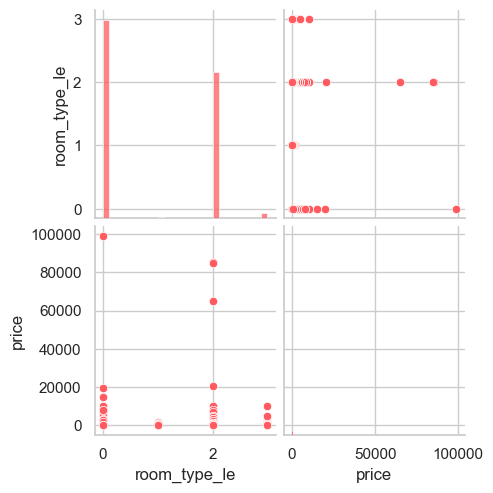

In [46]:
sns.pairplot(train_df[['room_type_le', 'price']])

In [47]:
le.inverse_transform([0, 1, 2, 3]) # Check the label encoder value

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

**Price check according to room_type**
- Hotel tends to be expensive
- Entier Home/apt needs to be checked for outliers


${\rightarrow}$ Remove price anomalies for the entire house 
- The reason for not dividing by group is that the number of specific labels is small

> If price is 0, it can be confirmed that availability_365 value is also 0
> - If the price is 0, you will notice that reservation is not possible 
> Remove if ${\Rightarrow}$ price is 0

In [48]:
train_df.groupby('room_type')['price'].agg(['median','mean','min', 'max', 'std','var'])

,median,mean,min,max,std,var
room_type,,,,,,
Entire home/apt,174.0,249.260155,10,99000,737.690299,5.441870e+05
Hotel room,240.0,309.959391,0,1592,284.291418,8.082161e+04
Private room,73.0,135.036592,10,85170,1081.075474,1.168724e+06
Shared room,56.0,126.243478,15,10000,497.519274,2.475254e+05


In [49]:
# Non-rentable house with a price of 0 
train_df[train_df['price']== 0 ].head(10)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,camping,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le
19977,40560656,"The Hoxton, Williamsburg - Cosy Room",273324213,Brooklyn,Williamsburg,Hotel room,0,1,83,1.98,...,0,0,0,0,0,,0,2023-02-17,2023.0,1
20459,41740615,The James New York - NoMad,268417148,Manhattan,Midtown,Hotel room,0,1,48,1.18,...,0,0,0,1,0,new,1,2022-10-10,2022.0,1
20460,41740622,Gardens Suites Hotel by Affinia,269311462,Manhattan,Upper East Side,Hotel room,0,1,5,0.15,...,0,0,0,0,0,,0,2022-10-01,2022.0,1
20542,41792753,Mint House At 70 Pine,197053492,Manhattan,Financial District,Hotel room,0,1,619,10.81,...,0,0,0,0,0,,0,2023-01-02,2023.0,1
20718,42279171,Leon Hotel LES,265458818,Manhattan,Chinatown,Hotel room,0,1,348,8.05,...,0,0,0,0,0,,0,2023-02-13,2023.0,1
20790,42065545,Carvi Hotel NYC,310429455,Manhattan,Midtown,Hotel room,0,30,0,NaN,...,0,0,0,0,0,,0,NaT,NaN,1
20791,42065547,Hotel Five44,308721299,Manhattan,Hell's Kitchen,Hotel room,0,30,43,1.44,...,0,0,0,0,0,,0,2023-02-05,2023.0,1
20797,42065563,Opera House Hotel,309772430,Bronx,Mott Haven,Hotel room,0,30,0,NaN,...,0,0,0,0,0,,0,NaT,NaN,1
20798,42065564,The Wall Street Inn,314151200,Manhattan,Financial District,Hotel room,0,1,51,1.59,...,0,0,0,0,0,,0,2023-02-19,2023.0,1
20823,42228997,Sister City New York,314197504,Manhattan,Lower East Side,Hotel room,0,30,0,NaN,...,0,0,0,1,0,new,1,NaT,NaN,1


In [50]:
train_df[train_df['price']==0]['availability_365'].unique()

array([0])

Will those with zero price have more reviews than others? 
- Fast-selling rooms tend to have a large number of reviews


In [51]:
train_df[train_df['price']==0][['number_of_reviews','reviews_per_month','number_of_reviews_ltm']].agg(['mean','max','min','std','var'])

,number_of_reviews,reviews_per_month,number_of_reviews_ltm
mean,69.333333,2.586842,15.185185
max,619.000000,10.810000,79.000000
min,0.000000,0.050000,0.000000
std,134.547961,3.115777,23.424243
var,18103.153846,9.708067,548.695157


In [52]:
train_df[['number_of_reviews','reviews_per_month','number_of_reviews_ltm']].agg(['mean','max','min','std','var'])

,number_of_reviews,reviews_per_month,number_of_reviews_ltm
mean,25.862439,1.169153,7.738671
max,1842.000000,86.610000,1093.000000
min,0.000000,0.010000,0.000000
std,56.622843,1.789762,18.292355
var,3206.146368,3.203246,334.610255


Classification ${\rightarrow}$ have_price column for rooms/no rooms  
- Do not use due to large differences in proportions

In [53]:
train_df['have_price'] = False

In [54]:
train_df.loc[train_df['price'] > 0 , 'have_price'] = True

In [55]:
train_df['have_price'].value_counts(dropna=False, normalize=True) 

True     0.999371
False    0.000629
Name: have_price, dtype: float64

In [56]:
train_df['have_price'].value_counts(dropna=False) 

True     42892
False       27
Name: have_price, dtype: int64

**Excluding data with a price value of 0**

In [57]:
train_df = train_df[train_df['price'] > 0]

In [58]:
train_df['price'].min()

10

In [59]:
train_df[['number_of_reviews','reviews_per_month','number_of_reviews_ltm']].agg(['mean','max','min','std','var'])

,number_of_reviews,reviews_per_month,number_of_reviews_ltm
mean,25.835074,1.168327,7.733983
max,1842.000000,86.610000,1093.000000
min,0.000000,0.010000,0.000000
std,56.533180,1.788458,18.288066
var,3196.000404,3.198581,334.453353


In [60]:
train_df.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le,have_price
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,0.3,...,0,0,0,0,,0,2022-06-21,2022.0,0,True
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.3,...,0,0,0,0,,0,2019-12-02,2019.0,2,True


**Check the proportion of room_type by pie chart after excluding price of zero**

**Arithmetic data of non-zero price data**

In [61]:
train_df_rt_pr_describe = train_df.groupby('room_type')['price'].agg(['min', 'max', 'mean', 'median','std','var']).reset_index()

In [62]:
train_df_rt_pr_describe

,room_type,min,max,mean,median,std,var
0,Entire home/apt,10,99000,249.260155,174.0,737.690299,5.441870e+05
1,Hotel room,99,1592,359.188235,254.5,275.584628,7.594689e+04
2,Private room,10,85170,135.036592,73.0,1081.075474,1.168724e+06
3,Shared room,15,10000,126.243478,56.0,497.519274,2.475254e+05


**Check box plot by room_type**
- Considering outliers by type ${\rightarrow}$ Rejected  
- Eliminate outliers to the entire data target due to the relatively small number of hotel rooms or shared rooms

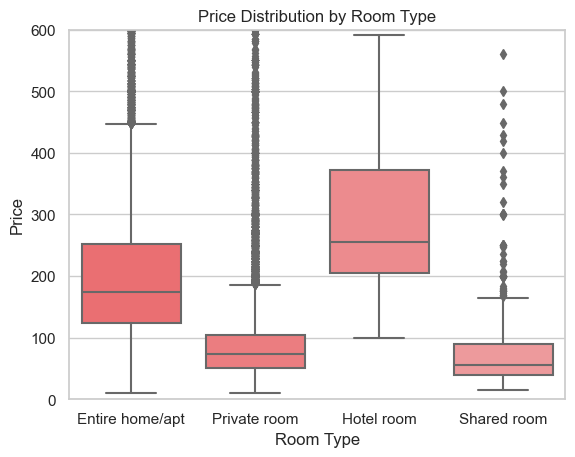

In [63]:
# Create price data frames by room type
room_type_price_df = train_df.groupby('room_type')['price'].median().reset_index()

# Draw a boxplot
sns.boxplot(data=train_df, x='room_type', y='price')

# Graph Title and Axis Label Settings
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 600)

# Graph Output
plt.show()


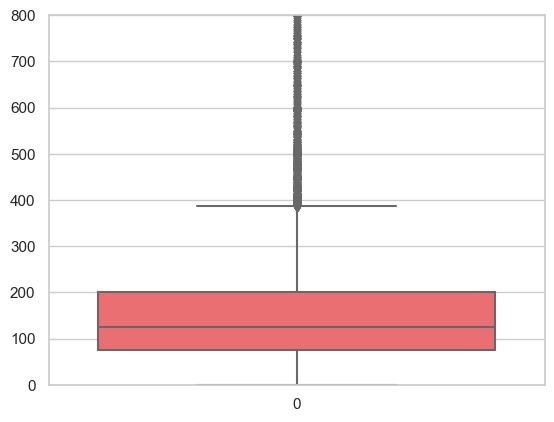

In [64]:
# Box plot for the entire price

sns.boxplot(df['price'])
plt.ylim(0, 800)
plt.show()

In [65]:
train_df['price'].mean()

200.4500139886226

In [66]:
train_df[train_df['price']==10].head(3)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le,have_price
10069,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Brooklyn,Bushwick,Private room,10,30,0,NaN,...,0,0,1,0,new,1,NaT,NaN,2,True
17204,34546192,"Large, Sunny, Quiet Room in Harlem, New York ...",1542506,Manhattan,Harlem,Private room,10,30,4,0.09,...,0,0,1,0,new,1,2019-09-16,2019.0,2,True
18775,38359468,1 Bedroom walking distance to UBS Arena,49494045,Queens,Queens Village,Entire home/apt,10,30,10,0.24,...,0,0,0,0,,0,2022-10-12,2022.0,0,True


In [67]:
# Date of most recently written date
train_df['last_review_dt'].max()

Timestamp('2023-03-06 00:00:00')

In [68]:
train_df[train_df['last_review_dt']=='2023-03-06']['id'].count()

26

**Check in descending order of price**

In [69]:
train_df['price'].sort_values(ascending=False)[:20]

34299    99000
32440    85170
34929    85100
9418     65115
9809     20500
31388    19750
33266    15000
18940    10000
19353    10000
27614    10000
2796     10000
8421     10000
18941    10000
12643    10000
18935    10000
16104    10000
42067     9999
36549     9999
3234      9999
21166     9999
Name: price, dtype: int64

In [70]:
# Checking Outliers 
train_df[train_df['price']==85170]

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le,have_price
32440,638990296543110131,Groovy bedroom in BK next to METRO & Industry ...,51913277,Brooklyn,Sunset Park,Private room,85170,1,38,4.52,...,0,0,0,0,,0,2022-12-31,2022.0,2,True


In [71]:
# a house that is actually priced at $65  
train_df[train_df['price']==65115]

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le,have_price
9418,16289102,"Comfy private room, great location to Manhattan",92493393,Staten Island,West Brighton,Private room,65115,2,55,0.72,...,0,0,0,0,,0,2022-07-29,2022.0,2,True


In [72]:
train_df[['neighbourhood_group','room_type']].value_counts()

neighbourhood_group  room_type      
Manhattan            Entire home/apt    11247
Brooklyn             Entire home/apt     8913
                     Private room        7129
Manhattan            Private room        6011
Queens               Private room        3681
                     Entire home/apt     3093
Bronx                Private room         875
                     Entire home/apt      772
Staten Island        Entire home/apt      249
Manhattan            Shared room          213
Brooklyn             Shared room          184
Staten Island        Private room         177
Manhattan            Hotel room           157
Queens               Shared room          134
Bronx                Shared room           41
Queens               Hotel room             8
Brooklyn             Hotel room             5
Staten Island        Shared room            3
dtype: int64

**Check prices by region by room_type**
- Manhattan's Airbnb prices are high
- Private room price on Staten Island may have outliers

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

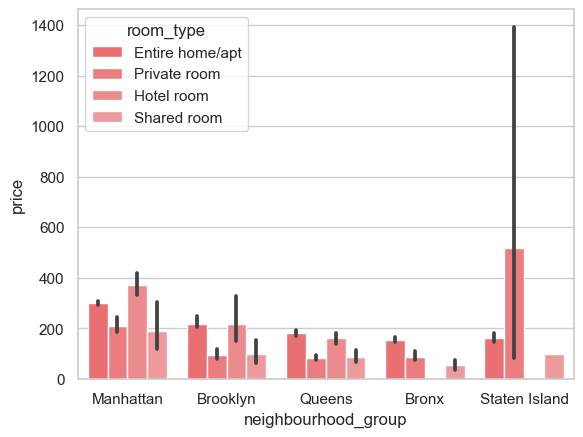

In [73]:
sns.barplot(x='neighbourhood_group', y ='price', hue = 'room_type', data = train_df)

In [74]:
train_df[train_df['neighbourhood_group']=='Staten Island']['price'].max()

65115

In [75]:
train_df[train_df['price']==65115]

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le,have_price
9418,16289102,"Comfy private room, great location to Manhattan",92493393,Staten Island,West Brighton,Private room,65115,2,55,0.72,...,0,0,0,0,,0,2022-07-29,2022.0,2,True


In [76]:
type(train_df)

pandas.core.frame.DataFrame

In [77]:
train_df.groupby('room_type').agg({'price': ['mean', 'min', 'max'], 'id' : ['count']})

price                id
                       mean min    max  count
room_type                                    
Entire home/apt  249.260155  10  99000  24274
Hotel room       359.188235  99   1592    170
Private room     135.036592  10  85170  17873
Shared room      126.243478  15  10000    575

**Check 99% of the price range by room type**

In [78]:
for i in train_df["room_type"].unique():
    a = train_df.loc[df["room_type"] == i, "price"].quantile(0.99)
    print(f'quantile_price of { i} :  {a}')


quantile_price of Entire home/apt :  1478.8100000000013
quantile_price of Private room :  1008.3999999999942
quantile_price of Hotel room :  1321.5700000000006
quantile_price of Shared room :  1275.999999999999


`Note` I tried to remove outliers by dividing them by room type, but I changed it to the entire target and commented on the code

In [79]:
# # Assuming df_train is your DataFrame containing 'price' and 'room_type' columns

# def remove_outliers_by_quantile(df, quantile=0.9, groupby_column='room_type', value_column='price'):
#     def filter_outliers(group):
#         quantile_val = group[value_column].quantile(quantile)
#         return group[group[value_column] <= quantile_val]

#     filtered_df = df.groupby(groupby_column).apply(filter_outliers)
#     filtered_df.reset_index(drop=True, inplace=True)

#     return filtered_df

# # Applying the function to your DataFrame
# df_train_filtered = remove_outliers_by_quantile(train_df)

# # Now df_train_filtered contains the data with values within the 90th quantile of price by room_type


In [80]:
train_df.groupby('room_type')['price'].agg(['mean','min','max','std','var'])

,mean,min,max,std,var
room_type,,,,,
Entire home/apt,249.260155,10,99000,737.690299,5.441870e+05
Hotel room,359.188235,99,1592,275.584628,7.594689e+04
Private room,135.036592,10,85170,1081.075474,1.168724e+06
Shared room,126.243478,15,10000,497.519274,2.475254e+05


**Check Generated & Existing Columns**
- **id**
- **name**

- **host_id**
- **neighbourhood_group**
- **neighbourhood**
- **room_type**
- **price**
- **minimum_nights**
- **number_of_reviews**
- **reviews_per_month**
- **number_of_reviews_ltm**
- **last_review**
- **calculated_host_listings_count**
- **availability_365**
- **ext_opt**
- **gym**
- **pool**
- **view**
- **park**
- **new**
- **ext_opt_new**
- **ext_opt_cnt**
- **last_review_dt**
- **last_review_year**
- **room_type_le**
- **have_price**



In [81]:
train_df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'number_of_reviews_ltm', 'last_review',
       'calculated_host_listings_count', 'availability_365', 'ext_opt', 'gym',
       'pool', 'beach', 'view', 'park', 'camping', 'skiing', 'lake', 'new',
       'surf', 'ext_opt_new', 'ext_opt_cnt', 'last_review_dt',
       'last_review_year', 'room_type_le', 'have_price'],
      dtype='object')

In [82]:
train_df.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le,have_price
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,0.3,...,0,0,0,0,,0,2022-06-21,2022.0,0,True
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.3,...,0,0,0,0,,0,2019-12-02,2019.0,2,True


In [83]:
drop_column_list = ['last_review','last_review_dt','name', 'ext_opt']

In [84]:
train_df.drop(drop_column_list,axis = 1 ,inplace = True )

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_11056/1068166413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(drop_column_list,axis = 1 ,inplace = True )


In [85]:
train_df

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,...,camping,skiing,lake,new,surf,ext_opt_new,ext_opt_cnt,last_review_year,room_type_le,have_price
0,2595,2845,Manhattan,Midtown,Entire home/apt,150,30,49,0.30,1,...,0,0,0,0,0,,0,2022.0,0,True
1,5121,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,0,...,0,0,0,0,0,,0,2019.0,2,True
2,5203,7490,Manhattan,Upper West Side,Private room,75,2,118,0.72,0,...,0,0,0,0,0,,0,2017.0,2,True
3,5178,8967,Manhattan,Midtown,Private room,68,2,575,3.41,52,...,0,0,0,0,0,,0,2023.0,2,True
4,5136,7378,Brooklyn,Sunset Park,Entire home/apt,275,60,3,0.03,1,...,0,0,0,0,0,,0,2022.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,28057253,Brooklyn,Williamsburg,Entire home/apt,76,7,0,NaN,0,...,0,0,0,0,0,,0,NaN,0,True
42927,839786573617495393,247439246,Manhattan,East Village,Private room,32,30,0,NaN,0,...,0,0,0,0,0,gym bbq,1,NaN,2,True
42928,839797749155954018,26349246,Brooklyn,Bushwick,Entire home/apt,127,3,0,NaN,0,...,0,0,0,0,0,,0,NaN,0,True
42929,839814083143454171,48533809,Staten Island,Bull's Head,Entire home/apt,280,1,0,NaN,0,...,0,0,0,0,0,,0,NaN,0,True


In [86]:
train_df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'availability_365', 'gym', 'pool', 'beach', 'view', 'park', 'camping',
       'skiing', 'lake', 'new', 'surf', 'ext_opt_new', 'ext_opt_cnt',
       'last_review_year', 'room_type_le', 'have_price'],
      dtype='object')

## 03. Remove Outliers

We tried to remove outliers based on quartiles.  
After removing outliers, we check correlation heatmap. 

In [87]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step)|(df[col] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers
        
Outliers_to_drop = detect_outliers(train_df, 0, ["price"])
final_train_df = train_df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)


/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_11056/4221377401.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_train_df[final_use_column].corr().round(2)


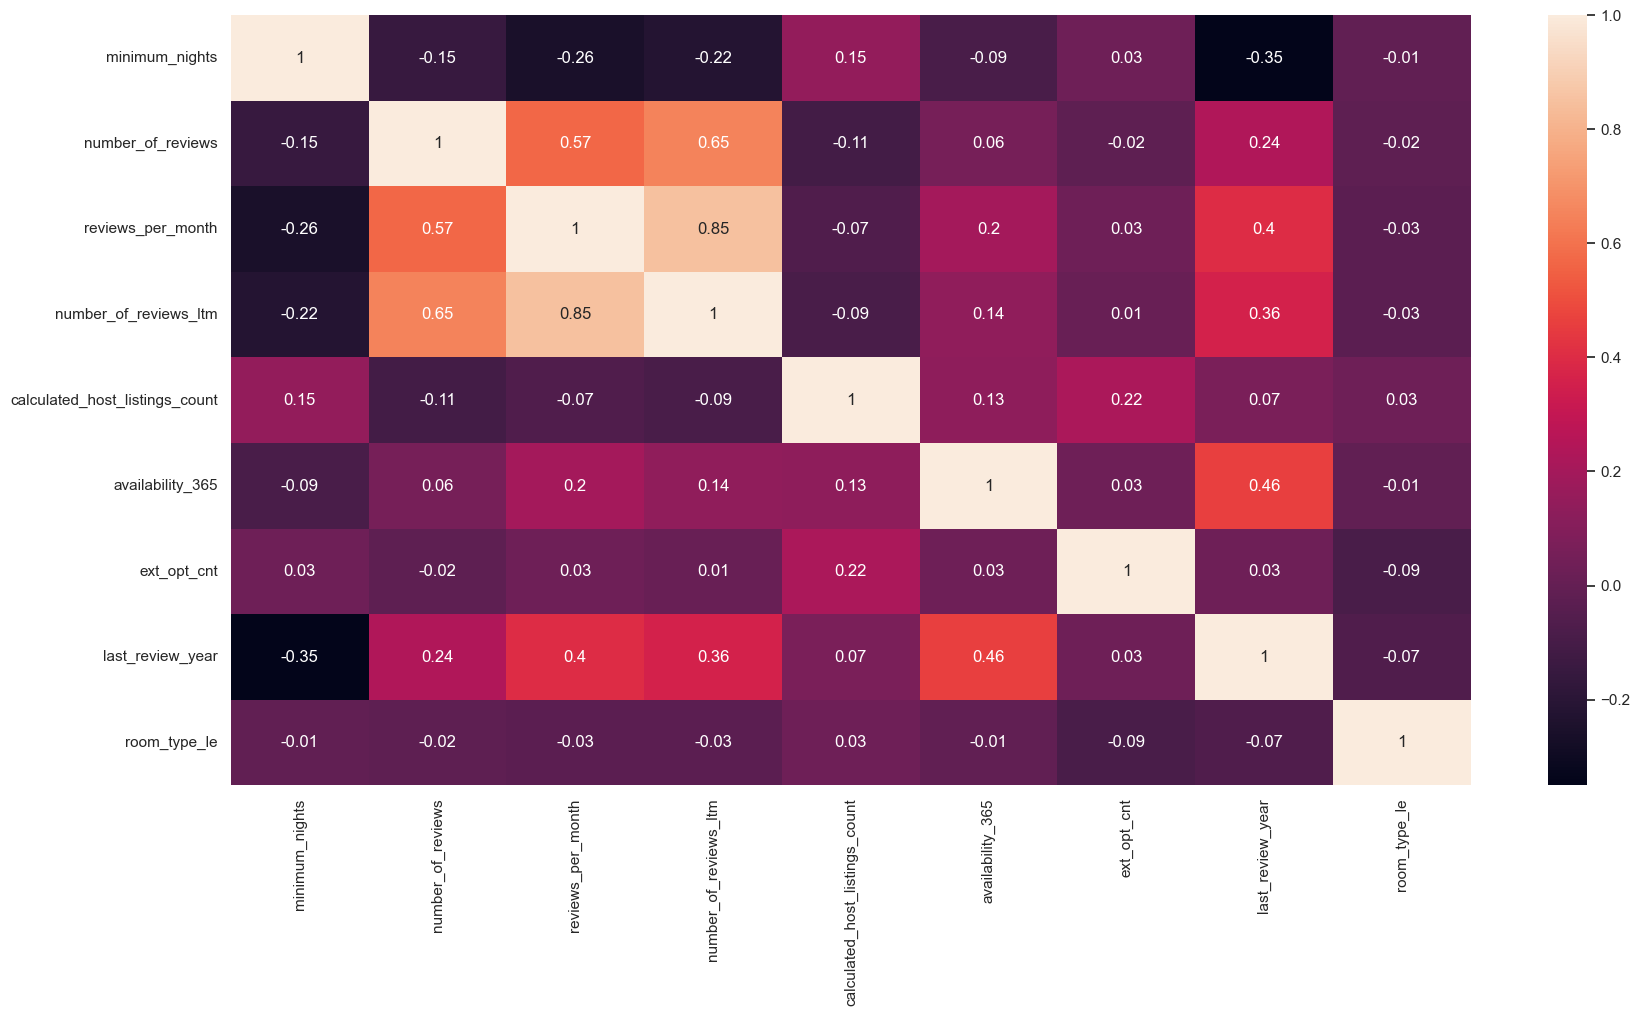

In [88]:
# We do not check feature importance for low frequency columns.
final_use_column = [ 'neighbourhood_group', 'neighbourhood', 'room_type',
                     'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                     'number_of_reviews_ltm', 'calculated_host_listings_count',
                     'availability_365', 'ext_opt_new', 'ext_opt_cnt',
                     # 'gym', 'pool', 'view', 'park',
                     # 'new', 'host_id', 'have_price',
                     'last_review_year', 'room_type_le']

# Create a correlation matrix
# Show up to the second decimal place
correlation_matrix = final_train_df[final_use_column].corr().round(2)

# Specifying Image Size
plt.figure(figsize=(20,10))

# Show Correlation Matrix
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [89]:
final_train_df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'availability_365', 'gym', 'pool', 'beach', 'view', 'park', 'camping',
       'skiing', 'lake', 'new', 'surf', 'ext_opt_new', 'ext_opt_cnt',
       'last_review_year', 'room_type_le', 'have_price'],
      dtype='object')

In [90]:
columns = final_train_df.columns

for c in columns :
    
    null_cnt = final_train_df[final_train_df[c].isnull()].count()['host_id']
    whole_cnt = final_train_df['host_id'].count()
    print( f"{c}의 null 비율 { round(null_cnt / whole_cnt,4) * 100} %" )


id의 null 비율 0.0 %
host_id의 null 비율 0.0 %
neighbourhood_group의 null 비율 0.0 %
neighbourhood의 null 비율 0.0 %
room_type의 null 비율 0.0 %
price의 null 비율 0.0 %
minimum_nights의 null 비율 0.0 %
number_of_reviews의 null 비율 0.0 %
reviews_per_month의 null 비율 22.21 %
number_of_reviews_ltm의 null 비율 0.0 %
calculated_host_listings_count의 null 비율 0.0 %
availability_365의 null 비율 0.0 %
gym의 null 비율 0.0 %
pool의 null 비율 0.0 %
beach의 null 비율 0.0 %
view의 null 비율 0.0 %
park의 null 비율 0.0 %
camping의 null 비율 0.0 %
skiing의 null 비율 0.0 %
lake의 null 비율 0.0 %
new의 null 비율 0.0 %
surf의 null 비율 0.0 %
ext_opt_new의 null 비율 0.0 %
ext_opt_cnt의 null 비율 0.0 %
last_review_year의 null 비율 22.21 %
room_type_le의 null 비율 0.0 %
have_price의 null 비율 0.0 %


In [91]:
final_train_df['last_review_year'].fillna(0, inplace = True)
final_train_df['reviews_per_month'].fillna(0, inplace = True)

In [92]:
used_cat_boosting_columns = ['host_id', 'neighbourhood_group', 'room_type', 'neighbourhood',
       'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365','ext_opt_new', 'ext_opt_cnt', 'last_review_year']

used_boosting_columns = [ 'host_id', 'neighbourhood_group', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'gym', 'pool', 'view', 'park',
       'new',  'ext_opt_cnt','last_review_year']

In [93]:
# categorical variable dummyization
boosting_df = final_train_df[used_boosting_columns]
boosting_df = pd.get_dummies(boosting_df)

In [94]:
boosting_df.shape
boosting_df.columns[:100]

Index(['host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'gym', 'pool',
       'view', 'park', 'new', 'ext_opt_cnt', 'last_review_year',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [95]:
# categorical variable dummyization
cat_boosting_df = final_train_df[used_cat_boosting_columns]
cat_boosting_df.to_csv('airbnb_preprocessing_data_for_cat.csv',index=False)


In [96]:
# save data for modeling
boosting_df.to_csv('airbnb_preprocessing_data.csv',index=False)